## Биометрия и Нейротехнологии
## Лабораторная работа №2.1 Pandas

<div style="text-align: right"> 
    ИТМО ПИиКТ<br>
    Чангалиди Антон, P3214<br>    
    Санкт-Петербург, 2020<br>
</div>

1. Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

2. Делаем какие-то сверхбазовые вещи:
    * напечатаем фразу
    * напишем функцию и вызовем ее
    * создадим 

In [2]:
print("Hi! This is a cell. Press the ▶ button above to run it")

Hi! This is a cell. Press the ▶ button above to run it


In [3]:
def print_10_nums():
    for i in range(10):
        print(i, end=' ')

In [4]:
print_10_nums()

0 1 2 3 4 5 6 7 8 9 

## Pandas
#### Series
Создаем серию:

In [5]:
my_series = pd.Series([1,3,5,7,9,23,65])
my_series

0     1
1     3
2     5
3     7
4     9
5    23
6    65
dtype: int64

У объекта Series есть атрибуты через которые можно получить список элементов и индексы, это values и index соответственно.

In [6]:
my_series.index

RangeIndex(start=0, stop=7, step=1)

In [7]:
my_series.values

array([ 1,  3,  5,  7,  9, 23, 65])

Доступ к элементам объекта Series возможны по их индексу

In [8]:
my_series[1]

3

* Индексы можно задавать явно:
* Делать выборку по ним, а также осуществлять присваивание (групповое)
* Делать фильтрацию по значению
* создавать из 'словаря' серию

In [9]:
my_series2 = pd.Series([1, 44, 67, 21], index=['allah', 'babah', 'damn', 'okaaayy'])
my_series2['babah']

44

In [10]:
my_series2[['okaaayy', 'babah']]

okaaayy    21
babah      44
dtype: int64

In [11]:
my_series2[['okaaayy', 'babah']] = 1000
my_series2

allah         1
babah      1000
damn         67
okaaayy    1000
dtype: int64

In [12]:
my_series2[my_series2>500]*3

babah      3000
okaaayy    3000
dtype: int64

In [13]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

a    5
b    6
c    7
d    8
dtype: int64

In [14]:
'c' in my_series3

True

У объекта Series и его индекса есть атрибут name, задающий имя объекту и индексу соответственно.

In [15]:
my_series3.name = 'чиселллкииии'
my_series3.index.name = 'буквы'
my_series3

буквы
a    5
b    6
c    7
d    8
Name: чиселллкииии, dtype: int64

Индекс можно поменять "на лету", присвоив список атрибуту index объекта Series

In [16]:
my_series3.index = ['A', 'B', 'C', 'D']
my_series3

A    5
B    6
C    7
D    8
Name: чиселллкииии, dtype: int64

#### Dataframe

In [17]:
data = pd.DataFrame({
    'country': ['Kazakh', 'Rus', 'Bel', 'Ukr'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
})
data

,country,population,square
0,Kazakh,17.04,2724902
1,Rus,143.50,17125191
2,Bel,9.50,207600
3,Ukr,45.50,603628


Можно по разному обращаться к столбцам, строкам и итерироваться по ним. 

In [18]:
data.country

0    Kazakh
1       Rus
2       Bel
3       Ukr
Name: country, dtype: object

In [19]:
data['country']

0    Kazakh
1       Rus
2       Bel
3       Ukr
Name: country, dtype: object

In [20]:
type(data['country'])

pandas.core.series.Series

In [21]:
data.columns

Index(['country', 'population', 'square'], dtype='object')

In [22]:
data.index

RangeIndex(start=0, stop=4, step=1)

Индекс по строкам можно задать разными способами, например, при формировании самого объекта DataFrame или "на лету":

In [23]:
df = pd.DataFrame({
    'artist': ['MORGENSHTERN', 'Kizaru', 'Yung Thug'],
    'age': [20, 30, 33],
    'money': [1350000, 535700, 99999999]
    }, index=['MG', 'KI', 'YT'])
df

,artist,age,money
MG,MORGENSHTERN,20,1350000
KI,Kizaru,30,535700
YT,Yung Thug,33,99999999


In [24]:
df.index = ['MRG', 'YVN', 'YTG']
df.index.name = 'short codes'
df

,artist,age,money
short codes,,,
MRG,MORGENSHTERN,20,1350000
YVN,Kizaru,30,535700
YTG,Yung Thug,33,99999999


Как видно, индексу было задано имя - Country Code. Стоит отметить, что объекты Series из DataFrame будут иметь те же индексы, что и объект DataFrame:

In [25]:
df['artist']

short codes
MRG    MORGENSHTERN
YVN          Kizaru
YTG       Yung Thug
Name: artist, dtype: object

Доступ к строкам по индексу возможен несколькими способами:
* .loc - используется для доступа по строковой метке
* .iloc - используется для доступа по числовому значению (начиная от 0)

In [26]:
df.loc['YVN']

artist    Kizaru
age           30
money     535700
Name: YVN, dtype: object

In [27]:
df.iloc[0]

artist    MORGENSHTERN
age                 20
money          1350000
Name: MRG, dtype: object

Их можно склеить!!!

In [28]:
df.loc['YVN']+df.iloc[2]

artist    KizaruYung Thug
age                    63
money           100535699
dtype: object

Ну и всякие выборки:

In [29]:
df.loc[['YVN', 'YTG'], 'money']

short codes
YVN      535700
YTG    99999999
Name: money, dtype: int64

In [30]:
df.loc['MRG':'YTG', :]

,artist,age,money
short codes,,,
MRG,MORGENSHTERN,20,1350000
YVN,Kizaru,30,535700
YTG,Yung Thug,33,99999999


In [31]:
df[df.age > 25][['artist', 'money']]

,artist,money
short codes,,
YVN,Kizaru,535700
YTG,Yung Thug,99999999


In [32]:
df.reset_index()

,short codes,artist,age,money
0,MRG,MORGENSHTERN,20,1350000
1,YVN,Kizaru,30,535700
2,YTG,Yung Thug,33,99999999


In [33]:
df['money_per_year_in_rubles'] = df['money'] / df['age'] * 70
df

,artist,age,money,money_per_year_in_rubles
short codes,,,,
MRG,MORGENSHTERN,20,1350000,4.725000e+06
YVN,Kizaru,30,535700,1.249967e+06
YTG,Yung Thug,33,99999999,2.121212e+08


In [34]:
df.drop(['money_per_year_in_rubles'], axis=1).drop(['YVN'], axis = 0)

,artist,age,money
short codes,,,
MRG,MORGENSHTERN,20,1350000
YTG,Yung Thug,33,99999999


In [35]:
df.rename(columns={'artist': 'rapper'})

,rapper,age,money,money_per_year_in_rubles
short codes,,,,
MRG,MORGENSHTERN,20,1350000,4.725000e+06
YVN,Kizaru,30,535700,1.249967e+06
YTG,Yung Thug,33,99999999,2.121212e+08


#### Чтение из файла (и запись)

In [36]:
df = pd.read_csv('apple.csv', sep=',')
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Adj Close
0,0,2017-02-22,136.429993,137.119995,136.110001,137.110001,20745300,137.110001
1,1,2017-02-21,136.229996,136.750000,135.979996,136.699997,24265100,136.699997
2,2,2017-02-17,135.100006,135.830002,135.100006,135.720001,22084500,135.720001
3,3,2017-02-16,135.669998,135.899994,134.839996,135.350006,22118000,135.350006
4,4,2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995
...,...,...,...,...,...,...,...,...
1253,1253,2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286
1254,1254,2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
1255,1255,2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
1256,1256,2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203


In [37]:
df.to_csv('apple.csv')

#### Группировка и аггрегирование

In [38]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head(15)

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


Необходимо подсчитать, сколько женщин и мужчин выжило, а сколько нет. В этом нам поможет метод .groupby.

In [39]:
titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count()

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64

А теперь проанализируйте в разрезе класса каюты:

In [40]:
titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count()

PClass  Survived
*       0             1
1st     0           129
        1           193
2nd     0           160
        1           119
3rd     0           573
        1           138
Name: PassengerID, dtype: int64

#### Сводные таблицы

In [41]:
pvt = titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count')
pvt

PClass,*,1st,2nd,3rd
Sex,,,,
female,NaN,143.0,107.0,212.0
male,1.0,179.0,172.0,499.0


In [42]:
pvt.loc['female', ['1st', '2nd', '3rd']]

PClass
1st    143.0
2nd    107.0
3rd    212.0
Name: female, dtype: float64

#### Анализ времени

Пример: цена на акции корпорации Apple за 5 лет по дням.

*P.s. Если колонка имеет формат даты и времени отличный от ISO8601, то для правильного перевода строки в нужный тип, можно использовать метод pandas.to_datetime.*

In [43]:
apple = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)
apple

,Unnamed: 0,Unnamed: 0.1,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,,
2017-02-22,0,0,136.429993,137.119995,136.110001,137.110001,20745300,137.110001
2017-02-21,1,1,136.229996,136.750000,135.979996,136.699997,24265100,136.699997
2017-02-17,2,2,135.100006,135.830002,135.100006,135.720001,22084500,135.720001
2017-02-16,3,3,135.669998,135.899994,134.839996,135.350006,22118000,135.350006
2017-02-15,4,4,135.520004,136.270004,134.619995,135.509995,35501600,135.509995
...,...,...,...,...,...,...,...,...
2012-02-29,1253,1253,541.560005,547.610023,535.700005,542.440025,238002800,70.278286
2012-02-28,1254,1254,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-27,1255,1255,521.309982,528.500000,516.280014,525.760017,136895500,68.117232


In [44]:
apple = apple.sort_index()
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1258 non-null   int64  
 1   Unnamed: 0.1  1258 non-null   int64  
 2   Open          1258 non-null   float64
 3   High          1258 non-null   float64
 4   Low           1258 non-null   float64
 5   Close         1258 non-null   float64
 6   Volume        1258 non-null   int64  
 7   Adj Close     1258 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 88.5 KB


Mean цена при закрытии биржи в конкретный месяц:

И всего:

In [45]:
apple.loc['2012-Feb', 'Close'].mean()

528.4820021999999

In [46]:
apple.loc['2012-Feb':'2015-Feb', 'Close'].mean()

430.43968317018414

Средняя цена закрытия по неделям:

In [47]:
apple.resample('W')['Close'].mean()

Date
2012-02-26    519.399979
2012-03-04    538.652008
2012-03-11    536.254004
2012-03-18    576.161993
2012-03-25    600.990001
                 ...    
2017-01-29    121.164000
2017-02-05    125.867999
2017-02-12    131.679996
2017-02-19    134.978000
2017-02-26    136.904999
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

Или например по месяцам:

In [50]:
apple.resample('M')['Close'].mean()

Date
2012-02-29    528.482002
2012-03-31    577.507727
2012-04-30    606.002999
2012-05-31    564.673179
2012-06-30    574.562378
                 ...    
2016-10-31    115.707143
2016-11-30    110.154285
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    132.897332
Freq: M, Name: Close, Length: 61, dtype: float64

#### Visualisation with Matplotlib

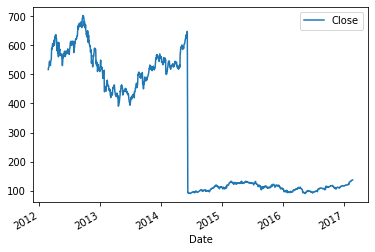

In [52]:
new_sample_df = apple.loc['2012-Feb':'2017-Feb', ['Close']]
new_sample_df.plot()
plt.show()

### Обычалка по матплот либ
*Смотреть в отдельной папке*